**Pyspark Streaming** es un sistema escalable y tolerante a fallos que sigue el paradigma de **lotes RDD**.

Opera en intervalos de lotes, recibiendo un **flujo de datos de entrada continuo** de fuentes como Apache Flume, Kinesis Kafka, sockets TCP, etc.

**Spark Engine** se encarga de procesarlos.


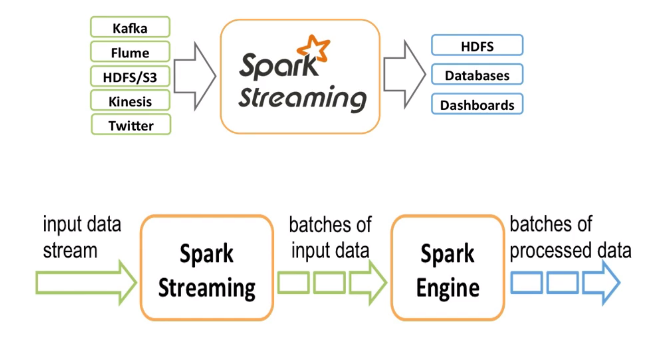

In [13]:
from IPython import display
display.Image("Images/Spark_Streaming1.png")

**Spark Streaming** recibe datos de varias fuentes y los agrupa en pequeños lostes (**Dstream**) en un intervalo de tiempo.

El usuario puede definir el **intervalo**. 

Cada lote de entrada forma un RDD y se procesa mediante trabajos de Spark para crear otros RDD.


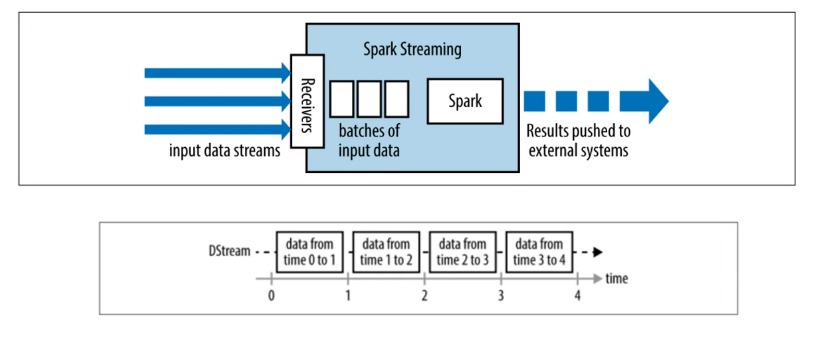

In [14]:
display.Image("Images/Spark_Streaming2.png")

Existen algunas fuentes de datos para la extracción de datos por ejemplo el protocolo TCP y los sockets, cada una tiene sus especifiaciones técnicas y configuraciones.

**Protocolo TCP (Transmission Control Protocol)** establece un conducto de comunicación punto a punto entre dos computadoras, es decir, cuando se requiere la transmisión de un flujo de datos entre dos equipos, el protocolo TCP establece un conducto exclusivo entre dichos equipos por el cual los datos serán transmitidos y este perdurará hasta que la transmisión haya finalizado, gracias a esto TCP garantiza que los datos enviados de un extremo de la conexión lleguen al otro extremo y en el mismo orden en que fueron enviados. Las características que posee TCP hacen que el protocolo sea conocido como un protocolo orientado a conexión.

Los **sockets** son una forma de comunicación entre procesos que se encuentran en diferentes máquinas de una red, los sockets proporcionan un punto de comunicación por el cual se puede enviar o recibir información entre procesos.

**Fuente de socket (para pruebas)** : lee datos de texto UTF8 de una conexión de socket. El zócalo del servidor de escucha está en el controlador. Tenga en cuenta que esto debe usarse solo para pruebas, ya que esto no proporciona garantías de tolerancia a fallas de extremo a extremo.

#### Ejemplo de llegada de datos con SparkStreaming.

En cada periodo de tiempo se van a actualizar las palabras de entrada, se procesan (cuentan) y se imprimen.

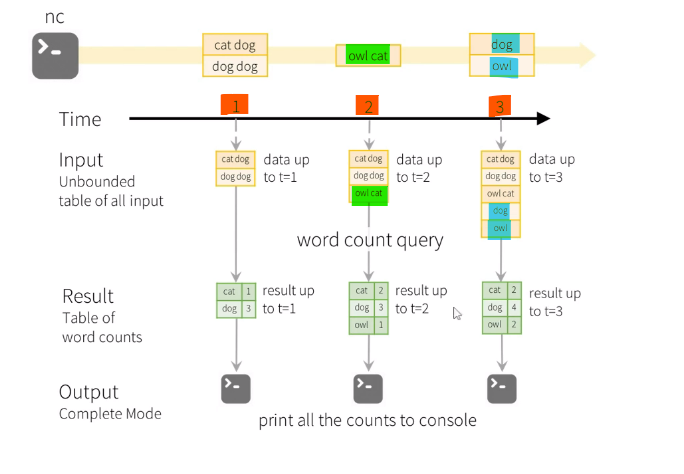

In [15]:
display.Image("Images/Spark_Streaming3.png")

Funciones claves en los procesos de SparkStreaming :

**readStream** : Creación de marcos de datos de transmisión y conjuntos de datos de transmisión.

**Generar función de acción** : Por ejemplo una agrupación, conteo, etc..

**writeStream** : Como queremos que se complete el proceso y $.start()$ inciar proceso.

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode
from pyspark.sql.functions import split

spark = SparkSession \
    .builder \
    .appName("StructuredNetworkWordCount") \
    .getOrCreate()

# Create DataFrame representing the stream of input lines from connection to localhost:9999
lines = spark \
    .readStream \
    .format("socket") \
    .option("host", "localhost") \
    .option("port", 9999) \
    .load()

# Split the lines into words
words = lines.select(
   explode(
       split(lines.value, " ")
   ).alias("word")
)

# Generate running word count
wordCounts = words.groupBy("word").count()

 # Start running the query that prints the running counts to the console
query = wordCounts \
    .writeStream \
    .outputMode("complete") \
    .format("console") \
    .start()

query.awaitTermination()

#### Modos de Salida

Spark usa varios modos de salida para almacenar datos:

**Modo completo (Complete)** : toda la tabla se almacenará

**Modo de acción (Append)** : Solo las nuevas filas del último proceso se almacenará. Solo para las consultas en las que no se espera que cambien las filas existentes.

**Modo de actualización (Update)** : Solo las filas que se actualizaron desde el último proceso se almacenarán. Este mode solo genera las filas que han cambiado desde el último proceso. Si la consulta no contien agregaciones, será equivalente al modo append.


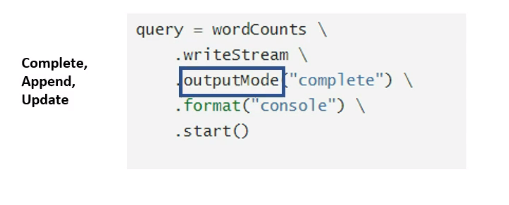

In [19]:
display.Image("Images/Spark_Streaming4.png")

#### Tipos de transformaciones

Para **tolerancia a fallos** los datos recibidos se copian en 2 nodos y hay también un mecanismo llamado **checkpointing**.

Guarda el estado periódicamente en estados de arhivos por ejemplo S3 o HDFS.

Las transformaciones se pueden agrupar en :

***Sin estado*** : no depende de los datos de lotes anteriores.

***Con estado*** : utilizan datos de lotes anteriores.

Tipo de transformación con Estado donde utilizamos una ventana deslizante una operación depende de los datos de los lotes anteriores.

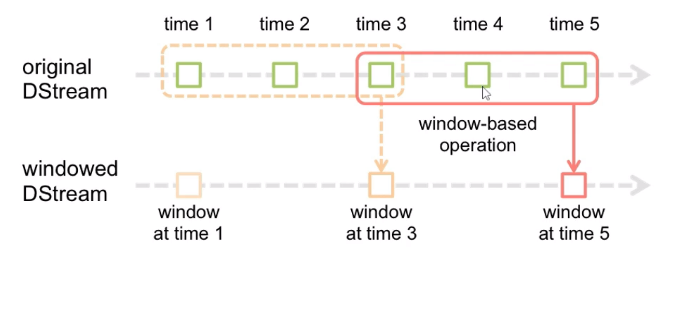

In [20]:
display.Image("Images/Spark_Streaming5.png")

#### Capacidades de Spark Streaming

Como se integra con diferentes componentes de Apache Spark.

Los datos de transmición se pueden obtener desde múltiples fuentes desde Kafka, Kinesis y flume hasta diferentes bases de datos.

Se pueden combinar bases de datos streaming y statics.

Se pueden realizar operaciones con Spark SQL y MLlib.

Entrenar modelos en tiempo real y predicciones en tiempo real.


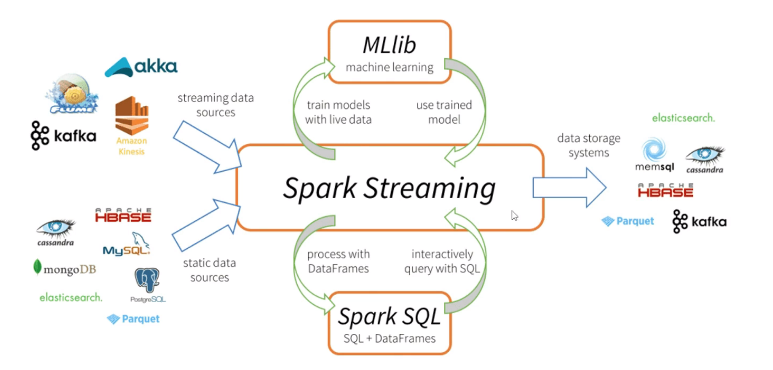

In [21]:
display.Image("Images/Spark_Streaming6.png")